In [2]:
!pip install prophet

In [4]:
import prophet

# check version
print(prophet.__version__)

1.1.4


In this example we shall be using the Car Sales Dataset to forecast the future sales of cars. The dataset contains monthly car sales data from January 1960 to December 1968. The data was obtained from [Github](https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv)."""

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [8]:
# laod the data
path = ("https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv")
df = pd.read_csv(path, header=0)

In [11]:
print(df.shape)
print(df.head())

(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


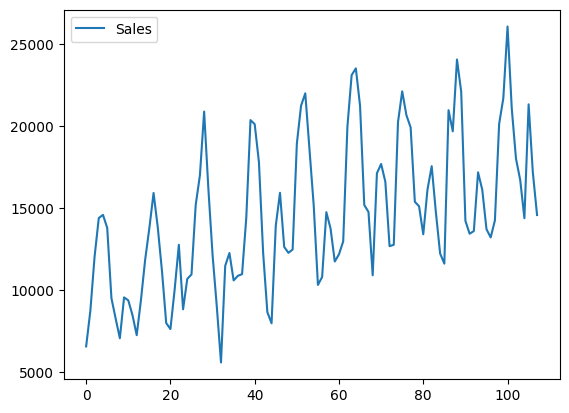

In [13]:
df.plot()
plt.show()

Let's explore how we can use prophet to make forecasts

In [21]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

In [24]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4cvnal7b/1g4yoayj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4cvnal7b/xmn2rxin.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79706', 'data', 'file=/tmp/tmp4cvnal7b/1g4yoayj.json', 'init=/tmp/tmp4cvnal7b/xmn2rxin.json', 'output', 'file=/tmp/tmp4cvnal7b/prophet_modelazwnyc3n/prophet_model-20230708124942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:49:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:49:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [25]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
  date = '1968-%02d' % i
  future.append([date])

print(future)

[['1968-01'], ['1968-02'], ['1968-03'], ['1968-04'], ['1968-05'], ['1968-06'], ['1968-07'], ['1968-08'], ['1968-09'], ['1968-10'], ['1968-11'], ['1968-12']]


In [31]:
# create a dataframe from the list
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

In [32]:
future.dtypes

ds    datetime64[ns]
dtype: object

In [33]:
# use the predict function to calculate the forecast
forecast = model.predict(future)

In [34]:
# check the forecast

"""
yhat       - forecasted value
yhat_lower - lower bound of the predicted value
yhat_upper - upper bound of the predicted value
"""
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14351.995309  12830.821751  15934.238425
1 1968-02-01  14927.433356  13442.047989  16488.260416
2 1968-03-01  20862.112451  19182.508814  22439.236914
3 1968-04-01  22884.245810  21419.722373  24614.455805
4 1968-05-01  24191.792278  22704.732192  25805.032798


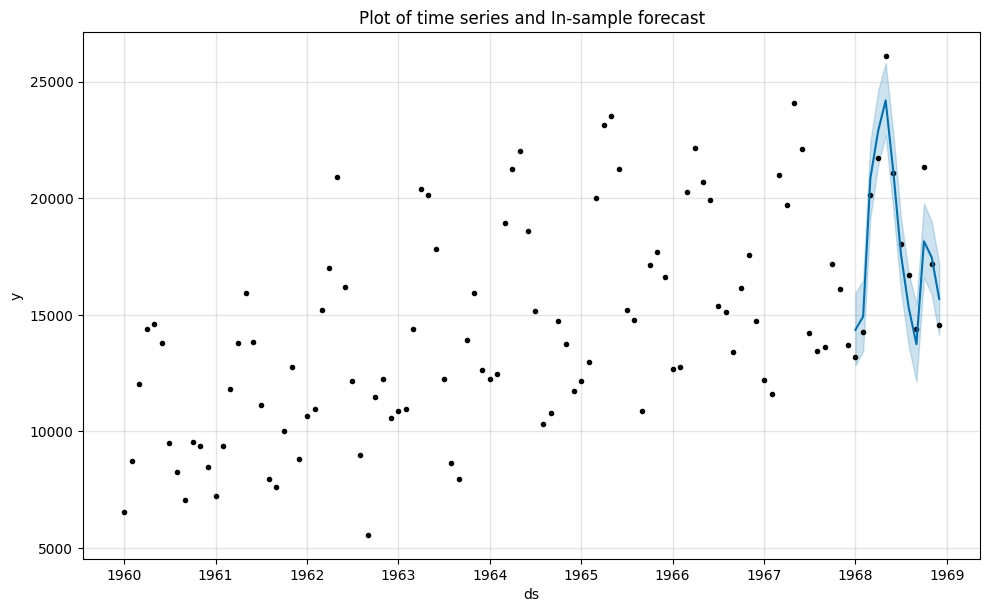

In [36]:
# plot forecast
model.plot(forecast)
plt.title("Plot of time series and In-sample forecast")
plt.show()

##### make an out-of-sample forecast

In [37]:
future = list()
for i in range(1,13):
  date = '1969-%02d' % i
  future.append([date])
print(future)

[['1969-01'], ['1969-02'], ['1969-03'], ['1969-04'], ['1969-05'], ['1969-06'], ['1969-07'], ['1969-08'], ['1969-09'], ['1969-10'], ['1969-11'], ['1969-12']]


In [39]:
# convert to df
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

In [41]:
# make forecasst using predict() function
forecast_0 = model.predict(future)

#summarise
print(forecast_0[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15395.816735  13839.493085  16995.996673
1 1969-02-01  16161.608504  14545.214242  17701.053831
2 1969-03-01  21380.483606  19730.890356  22990.449953
3 1969-04-01  23498.608574  21911.607104  25063.024682
4 1969-05-01  25007.161879  23412.667796  26696.137091


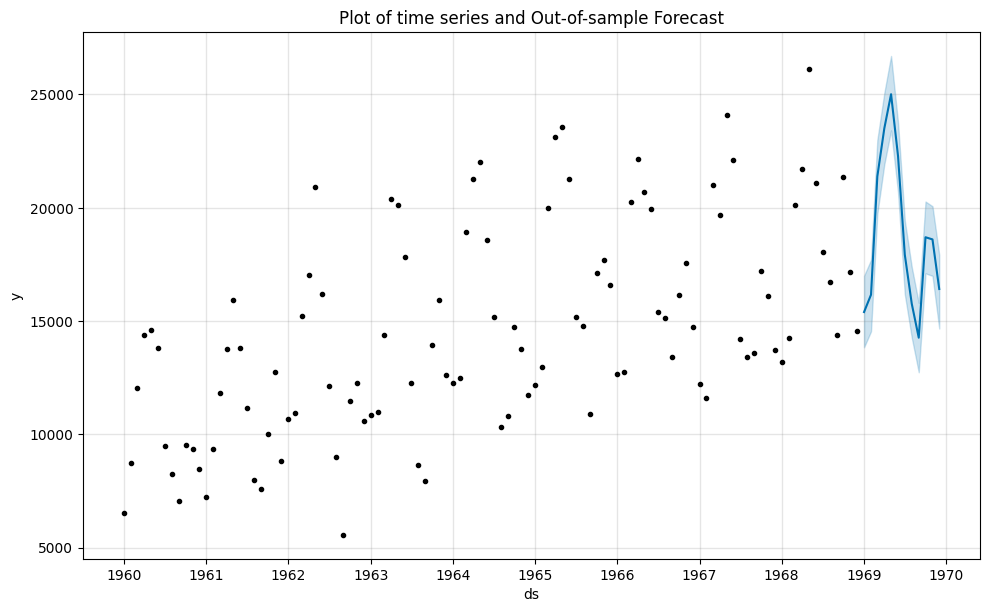

In [44]:
# plot forecast
model.plot(forecast_0)
plt.title("Plot of time series and Out-of-sample Forecast")
plt.show()

#### Evaluate forecast model

In [46]:
df.shape

(108, 2)

In [47]:
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())

           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


In [48]:
y_true = df['y'][-12:].values
y_true

array([13210, 14251, 20139, 21725, 26099, 21084, 18024, 16722, 14385,
       21342, 17180, 14577])

In [49]:
y_pred = forecast['yhat'].values
y_pred

array([14351.9953087 , 14927.4333561 , 20862.11245123, 22884.24581007,
       24191.79227775, 21088.60765158, 17600.76884382, 15308.75239944,
       13740.99069581, 18150.72986023, 17461.74589574, 15677.9225183 ])

In [51]:
# calculate the mae between ypred and ytrue
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1055.586


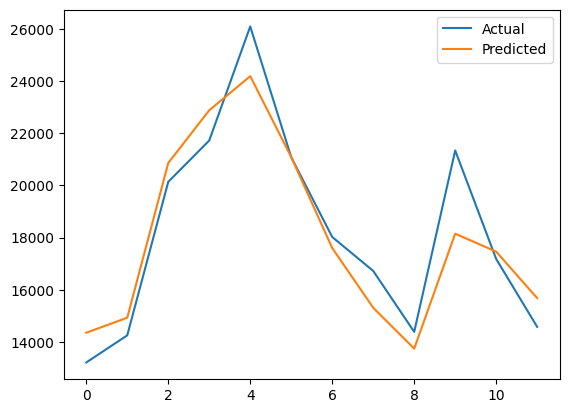

In [52]:
# plot the expected values vs predicted values
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()